In [2]:
# Data Exploration
import pandas as pd

df_output = pd.read_csv("data/output.csv")
df_clean = pd.read_csv("data/cleaned_data.csv")
df_nationality = pd.read_csv("data/nationality.csv")

In [2]:
df_output.head()

,Language,Index,Word
0,be,0,аборт
1,be,1,анальны
2,be,2,анус
3,be,3,задніца
4,be,4,асёл прыдурак


In [3]:
df_clean.head()

,Unnamed: 0,username,post,political_leaning,cleaned_post,amount_of_cursewords
0,0,t2_7ramzeng,"You can ""buy"" the show and stream it through t...",right,buy show stream including lethal weapon url ep...,4
1,1,t2_7ramzeng,"me want to play Q*bert Holy shit, based Alex J...",right,want play qbert holy shit based alex jones bro...,2
2,2,t2_7ramzeng,Shouldn't rely on any external services or per...,right,shouldnt rely external service persistent data...,3
3,3,t2_7ramzeng,PR to a specific person. Usually that just mea...,right,pr specific person usually mean roundrobin app...,5
4,4,t2_7ramzeng,This article's intention is clear that they wa...,right,article intention clear want imply causal rela...,1


In [4]:
df_nationality.head()

,auhtor_ID,post,nationality
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland
1,t2_10uons,games won to games played. Games played is cal...,Finland
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland
4,t2_10uons,get another role than support Lel people here ...,Finland


In [5]:
df_nationality["nationality"].nunique()

56

In [6]:
df_nationality['id'] = df_nationality.groupby(['nationality']).ngroup()
df_nationality

,auhtor_ID,post,nationality,id
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland,17
1,t2_10uons,games won to games played. Games played is cal...,Finland,17
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland,17
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland,17
4,t2_10uons,get another role than support Lel people here ...,Finland,17
...,...,...,...,...
82611,t2_57ogt82f,and Sergeant York. WWI didn't lend it'self to ...,United Kingdom,55
82612,t2_57ogt82f,a position where a person can get short term f...,United Kingdom,55
82613,t2_57ogt82f,you have to read the label. Some are just as h...,United Kingdom,55
82614,t2_57ogt82f,as traitors. Some suggesting it was treason. T...,United Kingdom,55


In [7]:
import json
import csv
import numpy as np
from tqdm import tqdm
import string
import re
import nltk
from nltk.corpus import stopwords


In [8]:
#only run following if you have not yet downloaded the stopwords
# nltk.download('stopwords') 
# nltk.download('punkt')
# nltk.download('wordnet')

In [9]:
def preprocess(text):
    text = text.lower()

    text  = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]',"", text)

    tokens = nltk.word_tokenize(text)

    return tokens

In [10]:
def remove_stopwords (tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [11]:
def lemmatization(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized

In [12]:
def clean_text(text):
    tokens = preprocess(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatizer = lemmatization(filtered_tokens)
    clean = " ".join(lemmatizer)
    return clean

In [13]:
df_nationality['new'] = df_nationality['post'].apply(clean_text)

KeyboardInterrupt: 

In [ ]:
csv_data = pd.read_csv('data/output.csv')
word_set = set(csv_data['Word'].values)
tqdm.pandas()

In [ ]:
df_nationality['cursewords'] = df_nationality['new'].apply(lambda x: sum([1 for word in x.split() if word in word_set]))

In [ ]:
df_nationality = df_nationality.rename(columns={'auhtor_ID': 'username'})
df_nationality.drop('post', axis=1)
df_nationality = df_nationality.rename(columns={'new': 'post'})

In [ ]:
df_nationality.to_csv("data/cleaned_data_nat.csv")

# Run from here if data is already processed

In [51]:
df_nationality = pd.read_csv("data/cleaned_data_nat.csv")

In [52]:
s = pd.value_counts(df_nationality.nationality)
print(s)

nationality
Germany                   12838
United Kingdom             7861
USA                        7646
The Netherlands            6905
Sweden                     3364
Finland                    3262
Poland                     3031
France                     2869
Italy                      2644
Spain                      2441
Ireland                    2328
Belgium                    2284
Romania                    2018
Denmark                    1960
Norway                     1801
Czech Republic             1490
Portugal                   1379
Greece                     1247
Austria                    1213
Canada                     1203
Slovenia                   1191
Hungary                    1188
Turkey                     1160
Russia                     1134
Croatia                    1063
Switzerland                1028
Ukraine                     843
Bulgaria                    669
Estonia                     647
Lithuania                   588
Serbia                      

C:\Users\20203527\AppData\Local\Temp\ipykernel_7544\2250302367.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  s = pd.value_counts(df_nationality.nationality)


In [53]:
large_countries = s[s>500]
large_countries

nationality
Germany            12838
United Kingdom      7861
USA                 7646
The Netherlands     6905
Sweden              3364
Finland             3262
Poland              3031
France              2869
Italy               2644
Spain               2441
Ireland             2328
Belgium             2284
Romania             2018
Denmark             1960
Norway              1801
Czech Republic      1490
Portugal            1379
Greece              1247
Austria             1213
Canada              1203
Slovenia            1191
Hungary             1188
Turkey              1160
Russia              1134
Croatia             1063
Switzerland         1028
Ukraine              843
Bulgaria             669
Estonia              647
Lithuania            588
Name: count, dtype: int64

In [54]:
len(large_countries)

30

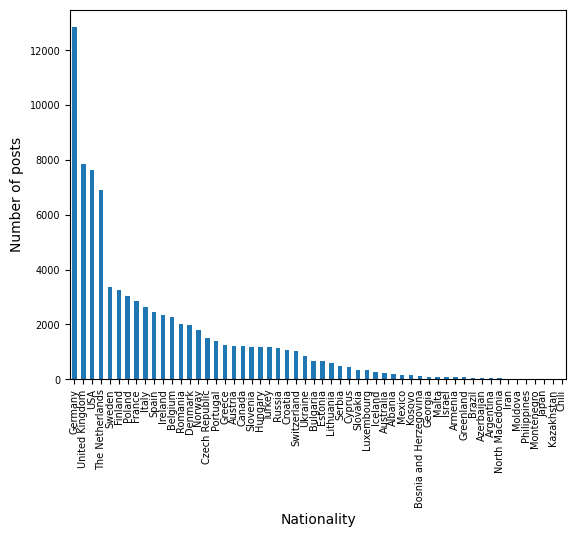

In [55]:
plt = s.plot(kind='bar', fontsize=7, xlabel = "Nationality", ylabel="Number of posts")

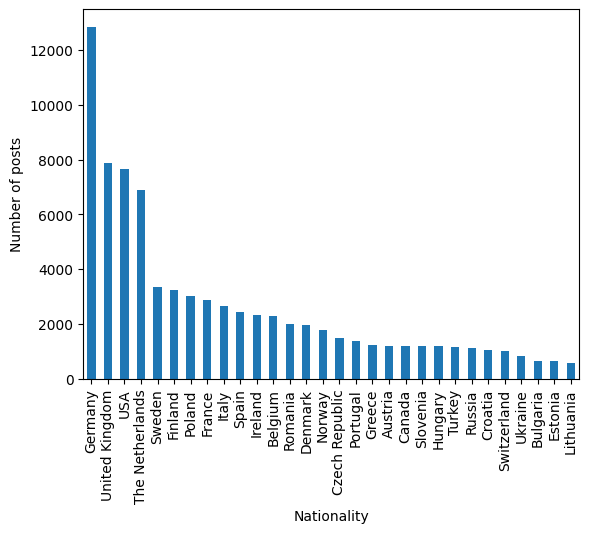

In [56]:
plt1 = large_countries.plot(kind='bar', fontsize=10, xlabel = "Nationality", ylabel="Number of posts")

In [57]:
df_nationality

,Unnamed: 0,username,post,nationality,id,post.1,cursewords
0,0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland,17,isnt show isnt legally binding depends also ra...,2
1,1,t2_10uons,games won to games played. Games played is cal...,Finland,17,game game played game played calculated compar...,6
2,2,t2_10uons,So with that logic USA is a very shitty place ...,Finland,17,logic usa shitty place live shooting per milli...,6
3,3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland,17,referring add lot ea activision etc rerelease ...,3
4,4,t2_10uons,get another role than support Lel people here ...,Finland,17,get another role support lel people thinking h...,7
...,...,...,...,...,...,...,...
82611,82611,t2_57ogt82f,and Sergeant York. WWI didn't lend it'self to ...,United Kingdom,55,sergeant york wwi didnt lend film fought cold ...,0
82612,82612,t2_57ogt82f,a position where a person can get short term f...,United Kingdom,55,position person get short term fame committing...,6
82613,82613,t2_57ogt82f,you have to read the label. Some are just as h...,United Kingdom,55,read label high red meat yet others low qualit...,5
82614,82614,t2_57ogt82f,as traitors. Some suggesting it was treason. T...,United Kingdom,55,traitor suggesting treason treason death penal...,2


In [58]:
df_nationality['cursewords']

0        2
1        6
2        6
3        3
4        7
        ..
82611    0
82612    6
82613    5
82614    2
82615    2
Name: cursewords, Length: 82616, dtype: int64

## Looking at the extremes in swearwords

In [59]:
# see what posts with over 100 curse words look like
df_nationality[df_nationality['cursewords'] >= 50]

,Unnamed: 0,username,post,nationality,id,post.1,cursewords
458,458,t2_169pyv,nach Festigkeit vorher anschmelzen aber nicht ...,Germany,20,nach festigkeit vorher anschmelzen aber nicht ...,98
1420,1420,t2_7vkt3,"Waren alle produziert werden, welche Arbeitsst...",Germany,20,waren alle produziert werden welche arbeitsstu...,50
1505,1505,t2_7vkt3,we have multiplication and addition for all nu...,Germany,20,multiplication addition number division subset...,67
1521,1521,t2_7vkt3,"In planar chaos, there are also 5 color-shifte...",Germany,20,planar chaos also colorshifted dragon legend f...,52
1549,1549,t2_7vkt3,the number. Or with the function f(x) = (x^(2)...,Germany,20,number function fx x x limit fx x go note deno...,53
11610,11610,t2_6z56v3b4,Tvoja keva Is this fucking Jermy form the ratt...,Croatia,12,tvoja keva fucking jermy form rattatoulie role...,911
15058,15058,t2_5r3bcw7l,These contact tracing apps are almost useless ...,Germany,20,contact tracing apps almost useless anyways ge...,490
15059,15059,t2_5r3bcw7l,cock horse cock horse cock horse cock horse co...,Germany,20,cock horse cock horse cock horse cock horse co...,195
15966,15966,t2_7v3qo4ja,a long time ago that abbott dude clearly was d...,United Kingdom,55,long time ago abbott dude clearly dropped head...,59
31322,31322,t2_12hvgq,that looks somewhat scary and gives me a jump ...,Poland,41,look somewhat scary give jump scare sometimes ...,53


In [60]:
df_nationality.value_counts('cursewords')

cursewords
3      8325
2      8316
4      7926
5      7277
1      7032
       ... 
52        1
51        1
50        1
47        1
147       1
Name: count, Length: 79, dtype: int64

In [69]:
df_nationality_cleaned = df_nationality[df_nationality['cursewords'] <= 50]

# Applying standard linear regression

Standard cleaned

In [70]:
import numpy as np
import seaborn as sns

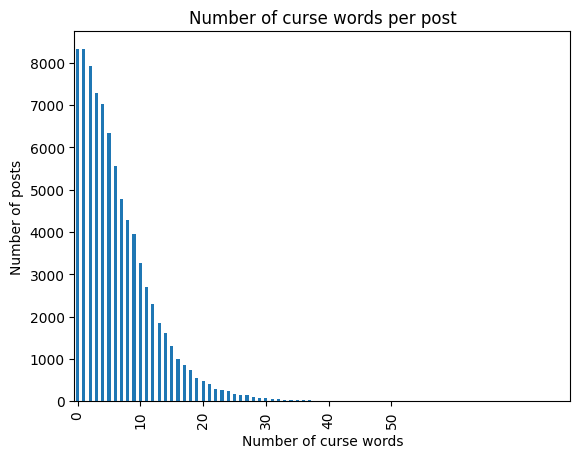

In [71]:
df_nationality.value_counts('cursewords').plot(kind='bar', fontsize=10, xlabel = "Number of curse words", ylabel="Number of posts", title="Number of curse words per post", xticks=np.arange(0, 51, 10));

In [72]:
correlation = df_nationality['id'].corr(df_nationality['cursewords'])
df_new = df_nationality[['id', 'cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                  id  cursewords
id          1.000000    0.023984
cursewords  0.023984    1.000000


In [73]:
import statsmodels.api as sm

X = df_new['cursewords']
Y = df_new['id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     47.55
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           5.40e-12
Time:                        11:44:35   Log-Likelihood:            -3.4984e+05
No. Observations:               82616   AIC:                         6.997e+05
Df Residuals:                   82614   BIC:                         6.997e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2127      0.062    548.985      0.0

Further cleaned data

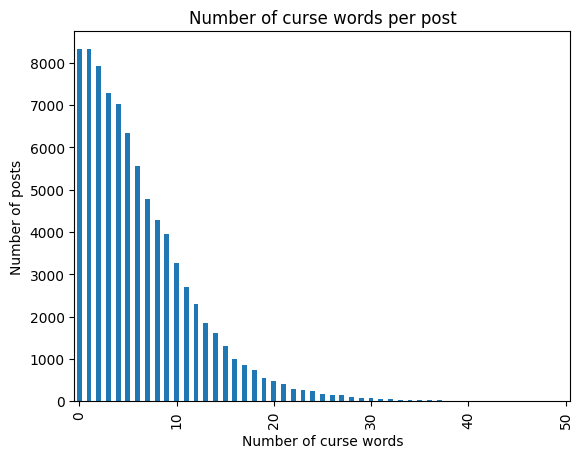

In [74]:
df_nationality_cleaned.value_counts('cursewords').plot(kind='bar', fontsize=10, xlabel = "Number of curse words", ylabel="Number of posts", title="Number of curse words per post", xticks=np.arange(0, 51, 10));

In [75]:
correlation = df_nationality_cleaned['id'].corr(df_nationality_cleaned['cursewords'])
df_new = df_nationality_cleaned[['id', 'cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                  id  cursewords
id          1.000000    0.065842
cursewords  0.065842    1.000000


Removing posts with 50+ cursewords has improved the "relevance" of cursewords on ID

In [76]:
import statsmodels.api as sm

# Split data into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, df_new, test_size=0.2, random_state=42)

X = X_train['cursewords']
Y = X_train['id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
y_pred = results.predict(X).astype('int64')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     293.4
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.26e-65
Time:                        11:44:41   Log-Likelihood:            -2.7962e+05
No. Observations:               66064   AIC:                         5.592e+05
Df Residuals:                   66062   BIC:                         5.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0041      0.102    325.002      0.0

# Politics

In [145]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [5]:
df_politics = pd.read_csv("data/cleaned_data.csv")

In [6]:
df_politics

,Unnamed: 0,username,post,political_leaning,cleaned_post,amount_of_cursewords
0,0,t2_7ramzeng,"You can ""buy"" the show and stream it through t...",right,buy show stream including lethal weapon url ep...,4
1,1,t2_7ramzeng,"me want to play Q*bert Holy shit, based Alex J...",right,want play qbert holy shit based alex jones bro...,2
2,2,t2_7ramzeng,Shouldn't rely on any external services or per...,right,shouldnt rely external service persistent data...,3
3,3,t2_7ramzeng,PR to a specific person. Usually that just mea...,right,pr specific person usually mean roundrobin app...,5
4,4,t2_7ramzeng,This article's intention is clear that they wa...,right,article intention clear want imply causal rela...,1
...,...,...,...,...,...,...
57226,57226,t2_4ngvl16j,a good one? That's odd. I remember it as being...,center,good one thats odd remember may closer may clo...,5
57227,57227,t2_4ngvl16j,"boring shit in the fucking world. ""History doe...",center,boring shit fucking world history doesnt repea...,11
57228,57228,t2_4ngvl16j,you see no contradiction there? Why or why not...,center,see contradiction gtor seriously brain damaged...,14
57229,57229,t2_4ngvl16j,is only created by an incommensurate worldview...,center,created incommensurate worldview im sure castr...,14


In [32]:
# encode political leaning as a number in 'political_leaning_id'where left is -1, center is 0, and right is 1
df_politics['political_leaning_id'] = df_politics['political_leaning'].apply(lambda x: -1 if x == 'left' else 0 if x == 'center' else 1)

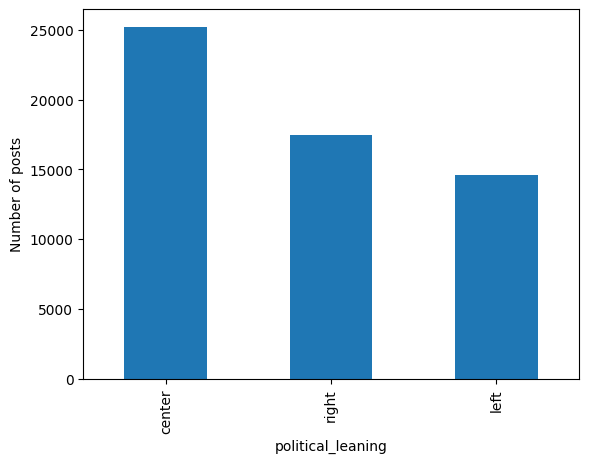

In [8]:
df_politics.value_counts('political_leaning').plot(kind='bar', fontsize=10, xlabel = "political_leaning", ylabel="Number of posts");

In [33]:
correlation = df_politics['political_leaning_id'].corr(df_politics['amount_of_cursewords'])
df_new = df_politics[['political_leaning_id', 'amount_of_cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                      political_leaning_id  amount_of_cursewords
political_leaning_id              1.000000              0.053978
amount_of_cursewords              0.053978              1.000000


In [35]:
import statsmodels.api as sm

# Split data into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, df_new, test_size=0.2, random_state=42)

X = X_train['amount_of_cursewords']
Y = X_train['political_leaning_id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
y_pred = results.predict(X).astype('int64')

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     political_leaning_id   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     126.7
Date:                  Thu, 21 Dec 2023   Prob (F-statistic):           2.38e-29
Time:                          11:39:02   Log-Likelihood:                -51487.
No. Observations:                 45784   AIC:                         1.030e+05
Df Residuals:                     45782   BIC:                         1.030e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

### Taking a closer look at the data

In [142]:
# calculate where std 1-3 of the data is below
threesigma = df_politics['amount_of_cursewords'].quantile(0.997)
twosigma = df_politics['amount_of_cursewords'].quantile(0.95)
onesigma = df_politics['amount_of_cursewords'].quantile(0.68)
print(threesigma, twosigma, onesigma)

52.0 21.0 10.0


In [143]:
df_politics[df_politics['amount_of_cursewords'] >= 52]

,Unnamed: 0,username,post,political_leaning,cleaned_post,amount_of_cursewords,political_leaning_id
293,293,t2_yhe63e4,and Heydrich et al. 2: Its spelled Eichmann As...,center,heydrich et al spelled eichmann someone consid...,201,0
2338,2338,t2_6308kyoq,"pretty down right now, im dad u/repostsleuthbo...",center,pretty right im dad urepostsleuthbot yeah id l...,1252,0
2339,2339,t2_6308kyoq,cum cum cum cum cum cum cum cum cum cum cum cu...,center,cum cum cum cum cum cum cum cum cum cum cum cu...,769,0
7126,7126,t2_5wck8ax5,a toe tag. Oh yeah Amazing Amazing Wow Thanks ...,center,toe tag oh yeah amazing amazing wow thanks wow...,67,0
10007,10007,t2_udczs,the chance of it working is really low lol. Th...,right,chance working really low lol guy basically st...,52,1
...,...,...,...,...,...,...,...
47054,47054,t2_4oy6tqzq,he his helped senegal win U da goat Wtf ronny ...,center,helped senegal win u da goat wtf ronny watchin...,52,0
49370,49370,t2_70nq1e7t,(: Can i crush your balls 🥰😍😍😍🥵🥵🥵🥵🤤🤤🤤🤤🤤 Minecu...,right,crush ball minecum ruselessredcircle youre mom...,1195,1
49371,49371,t2_70nq1e7t,cum cum cum cum cum cum cum cum cum cum cum cu...,right,cum cum cum cum cum cum cum cum cum cum cum cu...,615,1
55327,55327,t2_14xq38,loses reproductive rights Irish joe at it agai...,left,loses reproductive right irish joe also checke...,55,-1


In [144]:
df_politics_cleaned = df_politics[df_politics['amount_of_cursewords'] <= 52]

There are 143662053 words in the combination of all review.
There are 121012981 words in the combination of all review.
There are 210426352 words in the combination of all review.


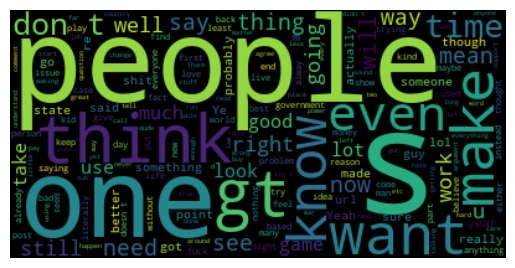

In [146]:
#Wordcloud en mooie plaatje:

df_right = df_politics_cleaned[df_politics_cleaned['political_leaning'] == 'right']
df_left = df_politics_cleaned[df_politics_cleaned['political_leaning'] == 'left']
df_centered = df_politics_cleaned[df_politics_cleaned['political_leaning'] == 'center']
right_text = " ".join(word for word in df_right.post)
print("There are {} words in the combination of all review.".format(len(right_text)))
left_text = " ".join(word for word in df_left.post)
print("There are {} words in the combination of all review.".format(len(left_text)))
centered_text = " ".join(word for word in df_centered.post)
print("There are {} words in the combination of all review.".format(len(centered_text)))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(right_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

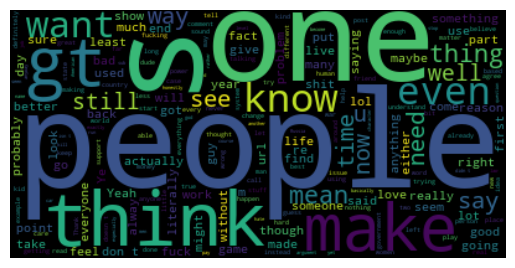

In [147]:
wordcloud = WordCloud().generate(left_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

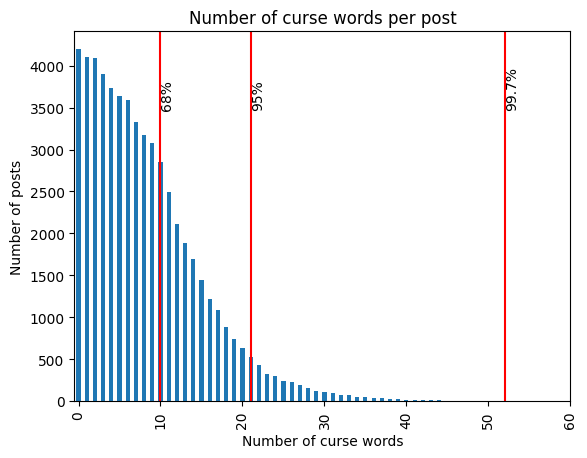

In [139]:
df_politics_cleaned.value_counts('amount_of_cursewords').plot(kind='bar', fontsize=10, xlabel = "Number of curse words", ylabel="Number of posts", title="Number of curse words per post", xticks=np.arange(0, 61, 10))

#plot the 1, 2, and 3 sigma lines
import matplotlib.pyplot as plt
plt.axvline(x=onesigma, color='r', linestyle='-')
plt.axvline(x=twosigma, color='r', linestyle='-')
plt.axvline(x=threesigma, color='r', linestyle='-')

# annotate the 1, 2, and 3 sigma lines
plt.text(onesigma, 3500, '68%', rotation=90)
plt.text(twosigma, 3500, '95%', rotation=90)
plt.text(threesigma, 3500, '99.7%', rotation=90);

### Look at the correlation with 3σ of the data

In [128]:
correlation = df_politics_cleaned['political_leaning_id'].corr(df_politics_cleaned['amount_of_cursewords'])
df_new = df_politics_cleaned[['political_leaning_id', 'amount_of_cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                      political_leaning_id  amount_of_cursewords
political_leaning_id              1.000000             -0.010445
amount_of_cursewords             -0.010445              1.000000


In [87]:
import statsmodels.api as sm

# Split data into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, df_new, test_size=0.2, random_state=42)

X = X_train['amount_of_cursewords']
Y = X_train['political_leaning_id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
y_pred = results.predict(X).astype('int64')

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     political_leaning_id   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     2.973
Date:                  Thu, 21 Dec 2023   Prob (F-statistic):             0.0846
Time:                          11:47:23   Log-Likelihood:                -44116.
No. Observations:                 39458   AIC:                         8.824e+04
Df Residuals:                     39456   BIC:                         8.825e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

at 3σ the amount of cursewords is not statistically relevant at p=0.05

### Look at the correlation with of 2σ of the data

In [130]:
df_politics_cleaned = df_politics[df_politics['amount_of_cursewords'] <= 21]

In [131]:
correlation = df_politics_cleaned['political_leaning_id'].corr(df_politics_cleaned['amount_of_cursewords'])
df_new = df_politics_cleaned[['political_leaning_id', 'amount_of_cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                      political_leaning_id  amount_of_cursewords
political_leaning_id              1.000000             -0.013773
amount_of_cursewords             -0.013773              1.000000


In [132]:
import statsmodels.api as sm

# Split data into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, df_new, test_size=0.2, random_state=42)

X = X_train['amount_of_cursewords']
Y = X_train['political_leaning_id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
y_pred = results.predict(X).astype('int64')

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     political_leaning_id   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     11.90
Date:                  Thu, 21 Dec 2023   Prob (F-statistic):           0.000562
Time:                          12:06:40   Log-Likelihood:                -48943.
No. Observations:                 43524   AIC:                         9.789e+04
Df Residuals:                     43522   BIC:                         9.791e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

at 2σ the amount of cursewords is statistically relevant at p=0.05 and p=0.01